# Tight Binding program to compute the band structure of simple semiconductors.
    
Parameters taken from Vogl, Hjalmarson and Dow,
[A Semiempirical Tight-Binding Theory of the Electronic Structure
of Semiconductors](http://www.sciencedirect.com/science/article/pii/0022369783900641), 
J. Phys. Chem. Sol. 44 (5), pp 365-378 (1983).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh
from collections import namedtuple

import TB

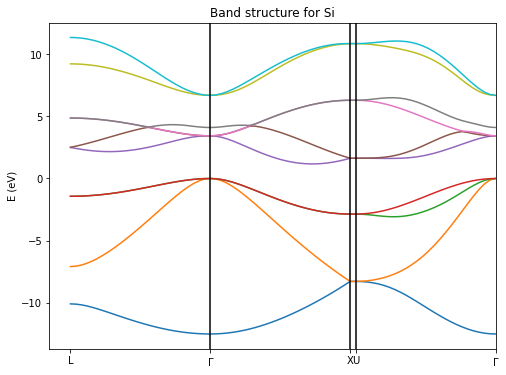

In [2]:
TB.band(TB.Si)

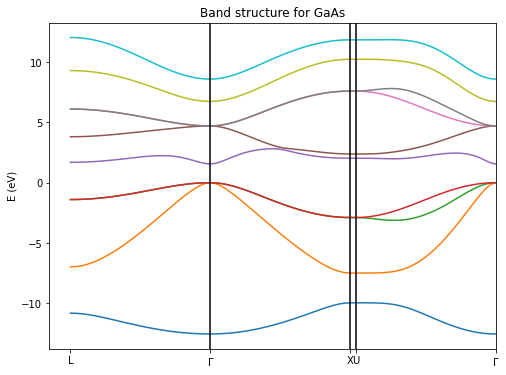

In [3]:
a =TB.band(TB.GaAs)

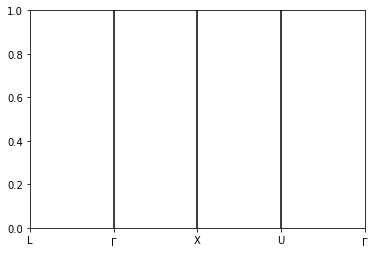

In [5]:
TB.band_labels(1)


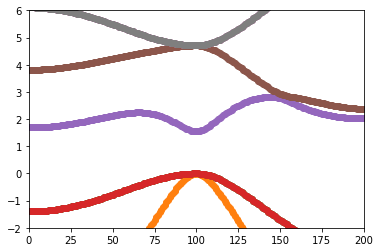

In [4]:
import numpy as np
n1,n2 = TB.bandpts(TB.GaAs).shape

bands =  TB.bandpts(TB.GaAs)

for i in range(n2):
    plt.plot(bands[:,i],'o')
plt.ylim([-2,6])
plt.xlim([0,200])


kpts = np.arange(0,bands.shape[0]).T
expbands=np.zeros((bands.shape[0],bands.shape[1]+1))
expbands[:,0]=kpts
expbands[:,1:]=bands

np.savetxt("gaas-bands.dat",expbands,delimiter=',')

In [25]:
expbands

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0

# Interpolated SiGe band structure
The band structure for Si(1-x)Ge(x) is supposedly well approximated by a linear interpolation of the Si and Ge band structures.

In [8]:
def SiGe_band(x=0.2):
    Si_data = TB.bandpts(TB.Si)
    Ge_data = TB.bandpts(TB.Ge)
    data = (1-x)*Si_data + x*Ge_data
    TB.bandplt("SiGe, %%Ge=%.2f" % x,data)
    return

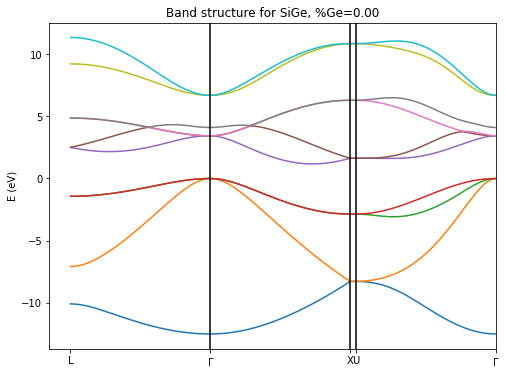

In [9]:
SiGe_band(0)

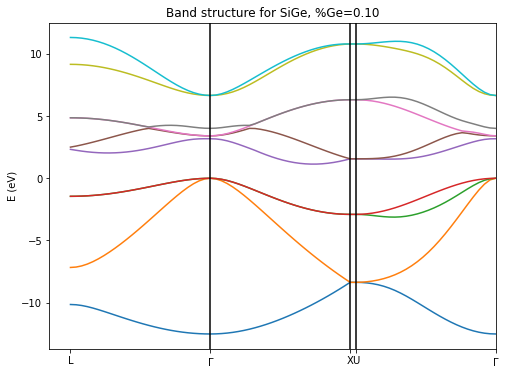

In [10]:
SiGe_band(0.1)

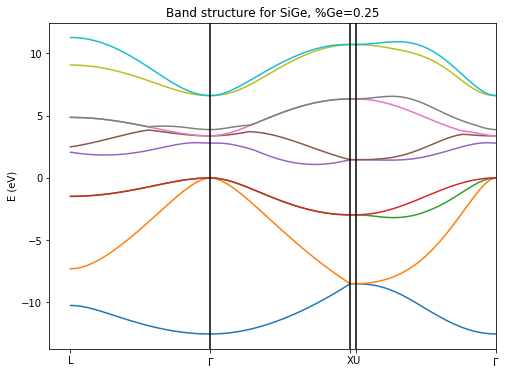

In [11]:
SiGe_band(0.25)

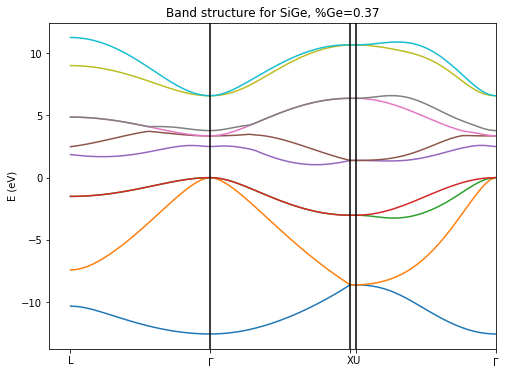

In [12]:
SiGe_band(0.37)

# Plotting misc parts of Brillouin zones
Compare Si and Ge CBs.

(-3.8000000000000003, 76.0, 0.6316102303784884, 3.5632566556962617)

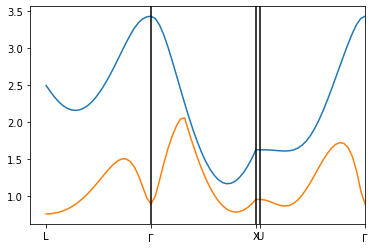

In [13]:
Ge_CB = TB.bandpts(TB.Ge)[:,4]
Si_CB = TB.bandpts(TB.Si)[:,4]

nk = len(Si_CB)
n = (nk-2)//3

plt.plot(Si_CB)
plt.plot(Ge_CB)
TB.band_labels(n)
plt.axis(xmax=3*n+1)

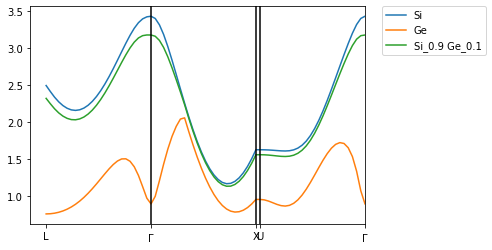

In [14]:
plt.plot(Si_CB,label='Si')
plt.plot(Ge_CB,label='Ge')
plt.plot(0.9*Si_CB + 0.1*Ge_CB,label='Si_0.9 Ge_0.1')
TB.band_labels(n)
plt.axis(xmax=3*n+1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [15]:
min_Si = min(Si_CB)
min_Ge = min(Ge_CB)
print min_Si, min_Ge
# min_Si - min_Ge = 0.12
Si_CB_shifted = Si_CB - min_Si + min_Ge + 0.12

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(min_Si, min_Ge)? (1585190045.py, line 3)